

---
**<font size="6">PROJECT 5: Customer Segmentation for Olist E-Commerce Platform</font>**
---
**Author : Alexis Marceau**

# Introduction and Objectives

**Olist**, a Brazilian e-commerce site, aims to provide its marketing teams with a **customer segmentation** that can be leveraged daily for targeted communication campaigns. The goal of this project is to **understand the different types of users** based on their behavior and personal data, enabling the team to make informed marketing decisions.

To achieve this, we will use **unsupervised methods** to group customers into similar profiles, creating an **actionable segmentation** that offers insights into the underlying customer patterns. Additionally, we will propose a **maintenance plan** based on the stability of these segments over time, ensuring the model remains relevant as customer behaviors evolve.

This project is structured into three main notebooks, each serving a distinct purpose:

1. **Exploratory Data Analysis (EDA)**: This notebook provides a comprehensive overview of the data, including data cleaning, feature engineering, and initial insights into customer behavior patterns.

2. **Segmentation**: In this notebook, we apply unsupervised machine learning methods to cluster customers into meaningful segments based on their behavior and purchasing characteristics. The segmentation is designed to help the marketing team understand and target distinct customer profiles.

3. **Stability of the Model**: Here, we assess the stability of the customer segments over time. This analysis will guide recommendations for maintaining and updating the segmentation model.

Each notebook contributes to the overall goal of delivering actionable customer segmentation and insights for Olist's marketing strategy.


In [ ]:
# Librairies import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for pandas to ensure all columns and rows are visible in outputs
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

# Data Overview and Cleaning

Olist's data includes various tables capturing different aspects of their e-commerce transactions. We will join these tables as needed to create a unified view of customer behavior for analysis and segmentation.

**Datasets:**
- `olist_customers_dataset.csv`: Basic customer information.
- `olist_sellers_dataset.csv`: Details about sellers.
- `olist_geolocation_dataset.csv`: Geolocation data.
- `olist_orders_dataset.csv`: Summary of customer orders.
- `olist_order_items_dataset.csv`: Items in each order.
- `olist_order_payments_dataset.csv`: Payment methods for each order.
- `olist_order_reviews_dataset.csv`: Reviews and ratings provided by customers.
- `olist_products_dataset.csv`: Product information.
- `product_category_name_translation.csv`: Translation of product category names.

We will conduct data cleaning and feature engineering on this unified dataset to prepare it for further analysis.

In [ ]:
# Loading the datasets

#dataset client
olist_customer = pd.read_csv('olist_customers_dataset.csv')

#dataset seller
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

#dataset geolocation
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')

#datasets orders
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

#datasets products
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_products_en = pd.read_csv('product_category_name_translation.csv')

In [ ]:
# all datasets list
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers, olist_products_en]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers', 'olist_products_en']

In [ ]:
# Creation of an informative dataset on all datasets
data_info = pd.DataFrame({})
data_info['datasets initiaux'] = names
data_info['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['number_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info

,datasets initiaux,cols,n_rows,n_cols,null amount,number_null_columns,null_columns_names
0,olist_customer,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,olist_geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,0,0,
2,olist_orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,olist_order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
4,olist_order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
5,olist_order_reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,145903,2,"review_comment_title, review_comment_message"
6,olist_products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,olist_sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,olist_products_en,"product_category_name, product_category_name_english",71,2,0,0,


---

## **Display first lines of the datasets**

In [5]:
#dataset client
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
#dataset vendeur
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
#dataset géolocalisation
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
#datasets commandes clients
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
#datasets commandes clients
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
#datasets commandes clients
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
#datasets commandes clients
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
#datasets produits
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
#datasets produits
olist_products_en.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


---

# Exploratory Data Analysis (EDA)

## Focus on : *'olist_products'* et *'olist_products_en'***

On the display of the first lines above, we can see that the two datasets have a common column, `product_category_name`. We can then merge the two datasets:

In [14]:
olist_products = pd.merge(olist_products, olist_products_en,
                    how="left",
                    on="product_category_name")

In [15]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [16]:
olist_products.shape

(32951, 10)

We delete variables that won't be useful: 
- `product_category_name` (the name of the product category in Portuguese), as we have the category in English (`product_category_name_english`) thanks to the join of the two datasets.
- Variables concerning product dimensions and weight, as I feel they are not useful for exploratory analysis or modeling.

In [17]:
features_to_remove = ["product_category_name",
                      "product_weight_g",
                      "product_length_cm",
                      "product_height_cm",
                      "product_width_cm"]

olist_products.drop(features_to_remove, axis=1, inplace=True)

In [18]:
olist_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


We can rename the `product_category_name_english` column to `product_category_name`.

In [19]:
olist_products = olist_products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
olist_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


Let's look at the different product categories:

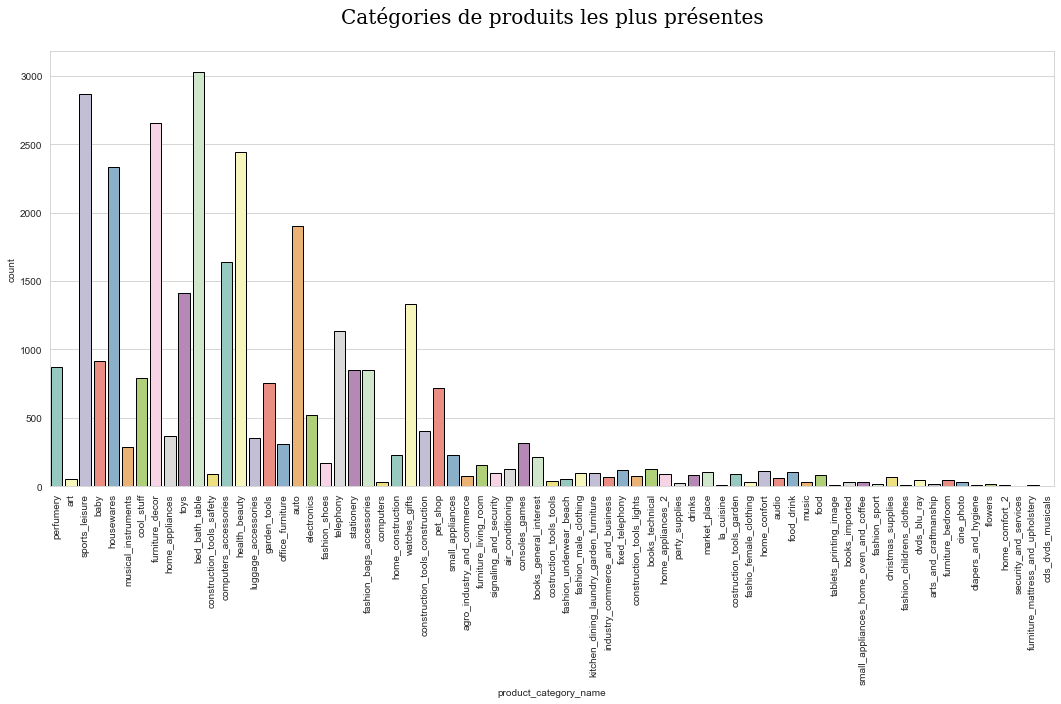

In [20]:
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "black",
              "weight": "normal",
              "size": 20}

fig = plt.figure(figsize=(18, 8))
ax = sns.countplot(x="product_category_name", 
                   data=olist_products, 
                   palette="Set3",
                   edgecolor="black",
                   )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Catégories de produits les plus présentes\n',fontdict=font_title)
None #don't show the label objects

### Product Category Distribution

The chart above shows the distribution of the most common product categories sold on the Olist e-commerce platform. We can observe a few key insights:

1. **Popular Categories**: Categories like **sport leisure**,**housewares**, **bed_bath_table**, **health_beauty**, and **furniture_decors** appear most frequently in the dataset. This indicates a high customer demand in these areas, making them key segments for targeted marketing campaigns.

2. **Diverse Range**: While certain categories dominate in terms of volume, Olist offers a wide range of products, from **sports_leisure** to **fashion_bags_accessories**. This diversity can appeal to various customer profiles, but it also suggests the need for a customized approach in marketing.

3. **Niche Segments**: Some categories, such as **cds_dvds_musicals** and **fashion_underwear_beach**, have significantly lower counts, indicating niche markets. While they might not drive as many sales, they could represent loyal customer groups or opportunities for specialized promotions.

Understanding the product distribution helps in creating segments based on customer preferences and targeting high-volume categories for promotional efforts.


## Focus on : *'olist_order_items'*, *'olist_orders'*, *'olist_order_payments'* et *'olist_order_reviews'*

Order line, order header and customer data can be grouped together in a single dataframe. The common column is `order_id`.

In [21]:
olist_order_items = pd.merge(olist_order_items, olist_orders,
                       how="left",
                       on="order_id")

olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


On supprime des variables qui ne seront pas utiles :

In [22]:
features_to_remove = ["seller_id", 
                      "shipping_limit_date",
                      "order_approved_at",
                      "order_delivered_carrier_date",
                      "order_estimated_delivery_date"]

In [23]:
olist_order_items.drop(features_to_remove, axis=1, inplace=True)
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


**Let's observe the price distribution, variable `price`**.

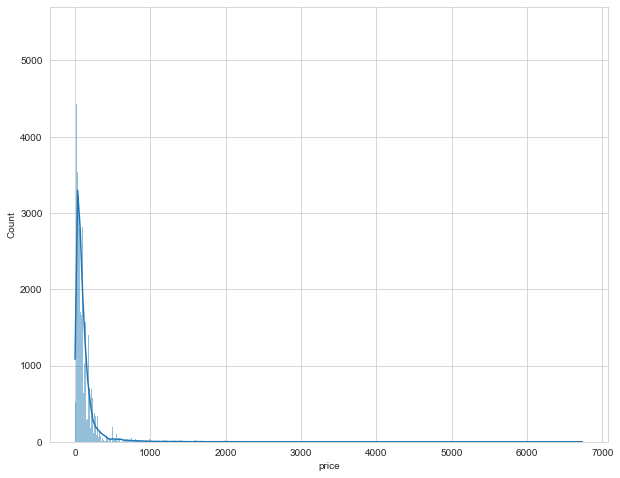

In [24]:
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=olist_order_items, x=(olist_order_items.price), kde=True)
plt.show()

The distribution of the variable `price` is asymmetrical and “very left-handed”, let's apply a **log10** to try to recenter the distribution and obtain a normal distribution :

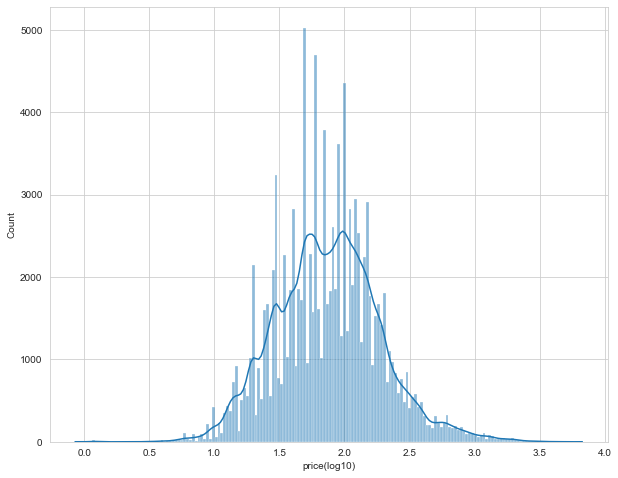

In [25]:
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=olist_order_items, x=np.log10(olist_order_items.price), kde=True)
plt.xlabel('price(log10)')
plt.show()

We get a good distribution, so we create a new variable `price(log10)`, which could be useful for our modeling.

In [26]:
olist_order_items['price(log10)'] = np.log10(olist_order_items.price)

**Let's look at the different order statuses:**

In [27]:
olist_order_items.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

We will keep only the lines corresponding to the orders delivered:

In [28]:
olist_order_items = olist_order_items[olist_order_items.order_status == "delivered"]

**Observe the number of orders placed over time:**

First, let's look at the type of time columns:

In [29]:
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]

In [30]:
olist_order_items[datetime_cols].dtypes

order_purchase_timestamp         object
order_delivered_customer_date    object
dtype: object

The time columns are of object type, so we'll change that to timestamp format:

In [31]:
# Modifie le format des variables d'object cols à timestamp 
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    olist_order_items[col] = olist_order_items[col].astype('datetime64[ns]')

Number of orders placed over time :

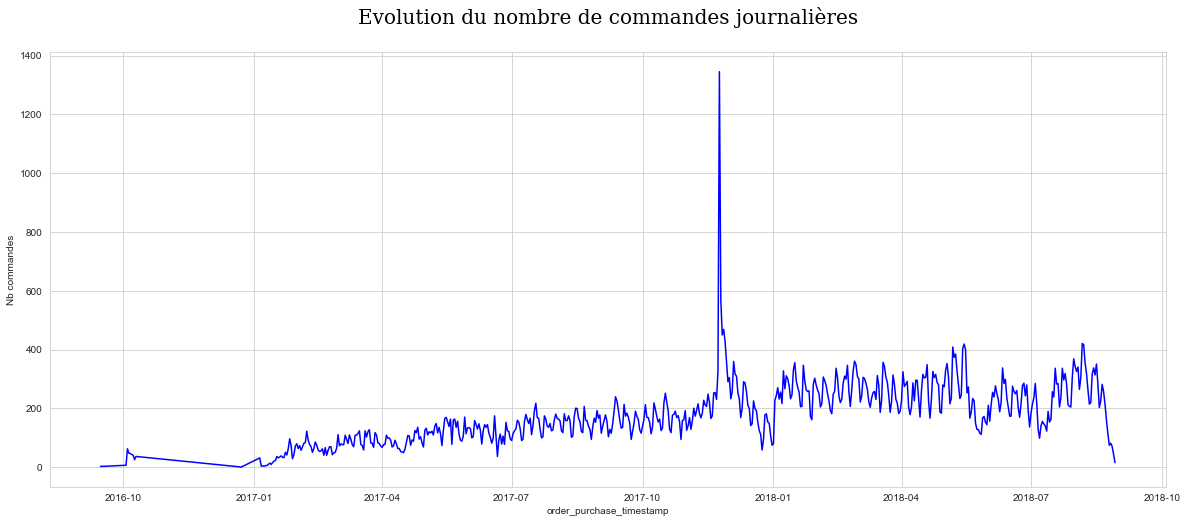

In [32]:
orders_per_days = olist_order_items.groupby(olist_order_items["order_purchase_timestamp"].dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="b")
ax.set_ylabel("Nb commandes")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.show()

In [33]:
orders_per_days.sort_values(ascending =False)

order_purchase_timestamp
2017-11-24    1345
2017-11-25     569
2017-11-27     469
2017-11-26     450
2017-11-28     427
              ... 
2017-01-07       5
2017-01-08       4
2017-01-06       4
2016-09-15       3
2016-12-23       1
Name: order_id, Length: 612, dtype: int64

We observe :
- A plateau of almost zero orders between October 2016 and January 2017, which may correspond to the start of the company's sales or the commissioning of the database.
- A peak in orders on November 24, 2017, which may correspond to Black Friday 2017, which was on November 24.

**We can also look at the breakdown of the number of orders by day of the week or time of day:**.

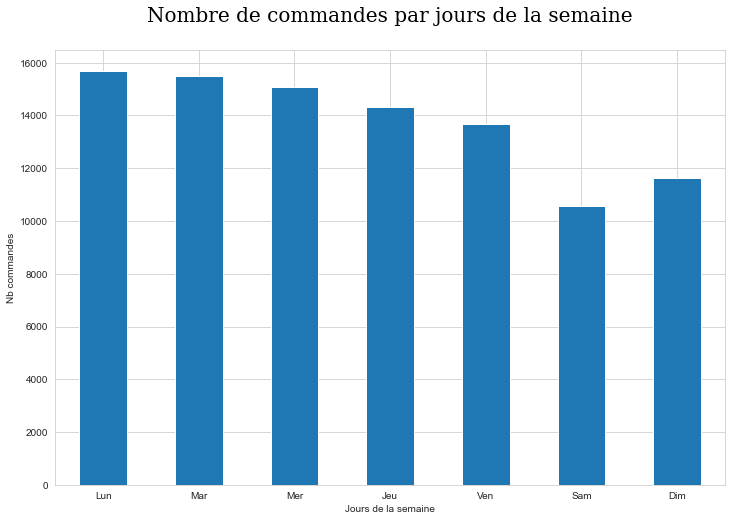

In [34]:
olist_order_items.groupby(olist_order_items['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          ylabel="Nb commandes",
          xlabel="Jours de la semaine",
          legend=False)
plt.xticks(np.arange(0,7), ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'], rotation='horizontal')
plt.title(f"Nombre de commandes par jours de la semaine\n",
          fontdict=font_title)
plt.show()

### Number of Orders by Day of the Week

The chart above displays the distribution of orders across the days of the week. Key observations include:

1. **High Order Volume on Weekdays**: The data reveals that customers are most active on weekdays, with **Monday** having the highest number of orders, closely followed by **Tuesday** and **Wednesday**. This trend suggests that customers are more likely to place orders at the beginning of the week.

2. **Lower Activity on Weekends**: There is a noticeable drop in the number of orders on **Saturday** and **Sunday**, indicating that customers are less inclined to shop during the weekend. This could be a key insight for planning marketing campaigns, as promotional efforts might be more effective when focused on weekdays.

Understanding these patterns helps optimize marketing timing, ensuring promotions are aligned with peak customer activity periods.


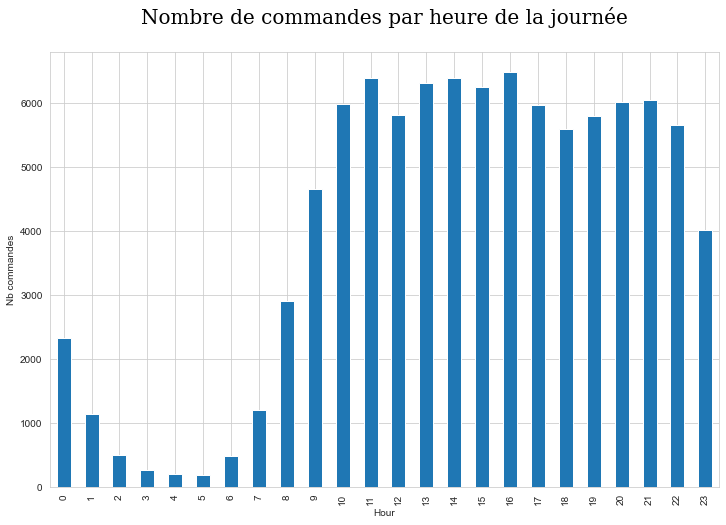

In [35]:
olist_order_items.groupby(olist_order_items['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          ylabel="Nb commandes",
          xlabel="Hour",
          legend=False)
plt.title(f"Nombre de commandes par heure de la journée\n",
          fontdict=font_title)
plt.show()

### Number of Orders by Hour of the Day

The chart above illustrates the distribution of orders by hour throughout the day, providing insights into peak shopping hours for Olist customers. Key observations include:

1. **Peak Ordering Times**: The highest volume of orders occurs between **10 AM and 5 PM**, indicating that most customers prefer to place orders during typical daytime hours. This trend could align with work breaks or lunch hours, suggesting that customers might browse and shop during these periods.

2. **Low Activity in Early Morning and Late Night**: Order activity is significantly lower during the late-night and early-morning hours, from **12 AM to 6 AM**, likely due to reduced online activity during these times.

3. **Consistent Activity in the Afternoon**: From **11 AM to 4 PM**, order volumes remain consistently high, making this an ideal window for marketing and promotional activities to capture customer interest.

These patterns suggest that marketing efforts could be optimized by focusing on peak hours when customers are most active, enhancing the effectiveness of targeted campaigns.


**Comparing sales between 2017 and 2018 from January to August:**

In [36]:
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10)
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813


In [37]:
# création de nouvelles variables provenant de l'extractions des dates
olist_order_items['order_purchase_year'] = olist_order_items['order_purchase_timestamp'].apply(lambda x: x.year)
olist_order_items['order_purchase_month'] = olist_order_items['order_purchase_timestamp'].apply(lambda x: x.month)
olist_order_items['order_purchase_month_name'] = olist_order_items['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
olist_order_items['order_purchase_year_month'] = olist_order_items['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
olist_order_items['order_purchase_date'] = olist_order_items['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [38]:
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204


In [39]:
df_orders_compare = olist_order_items.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
df_orders_compare.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-22 13:44:35,1.340444,2017,5,May,201705,20170515


In [40]:
year_orders = df_orders_compare['order_purchase_year'].value_counts()
year_orders

2018    60324
2017    24943
Name: order_purchase_year, dtype: int64

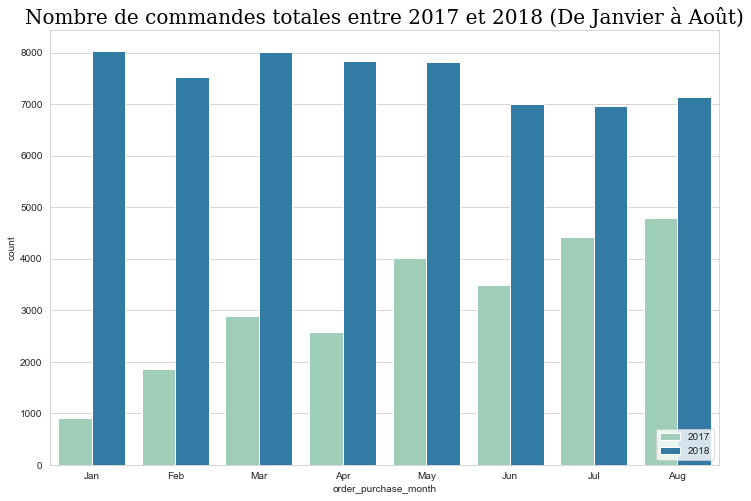

In [41]:
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.figure(figsize=(12,8))
sns.countplot(data=df_orders_compare, x='order_purchase_month', hue='order_purchase_year',
                 palette='YlGnBu')
plt.legend(loc='lower right')
plt.title('Nombre de commandes totales entre 2017 et 2018 (De Janvier à Août)',fontdict=font_title)
plt.xticks(np.arange(0,8), month_label, rotation='horizontal')
plt.show()

In [42]:
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
print('Augmentation du nombre de commandes entres 2017 et 2018 (pour les mois entre Janvier et Août): {} %'.format(growth))

Augmentation du nombre de commandes entres 2017 et 2018 (pour les mois entre Janvier et Août): 141 %


### Total Number of Orders Between 2017 and 2018 (January to August)

The chart above compares the total number of orders for each month from January to August in both 2017 and 2018. Key observations include:

1. **Strong Growth in 2017**: 2017 shows a significant rise in order volume, highlighting a period of rapid growth for Olist's customer base. This growth rate reflects a peak in demand during this year.

2. **141% Growth from 2017 to 2018**: The calculated growth from January to August 2017 compared to 2018 is **141%**, indicating substantial activity during this period in 2017.

3. **Stabilization in 2018**: In 2018, order volumes have stabilized with a slight decrease. This suggests that the platform has reached a more mature and consistent demand level.

These patterns highlight a strong growth phase followed by stabilization, which can inform future marketing and inventory strategies, focusing on maintaining engagement with a stable customer base.



**Merge *olist_order_payments* and *olist_order_items***:

In [43]:
olist_order_items = pd.merge(olist_order_items, olist_order_payments,
                       how="left",
                       on="order_id")

In [44]:
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204,1.0,credit_card,3.0,218.04


**Let's take a look at the most frequently used payment methods:**

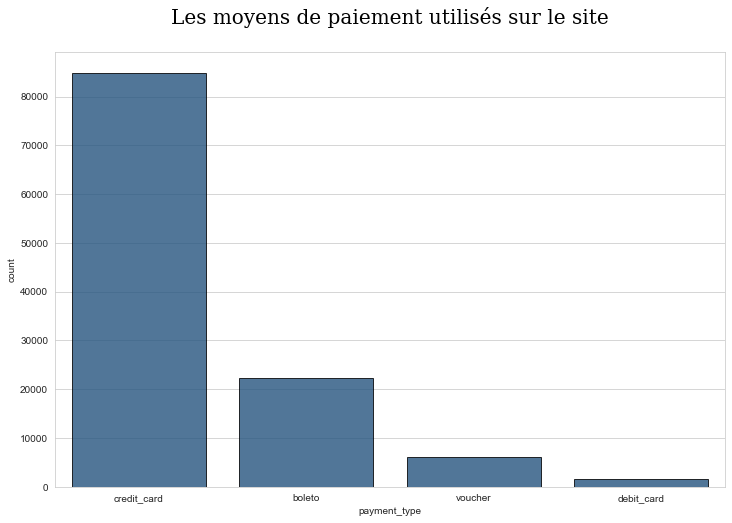

In [45]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=olist_order_items, x="payment_type",
              edgecolor="black",
              color="#16558e", alpha=0.8)
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontdict=font_title)
plt.show()

Most payments are made by credit card.

**Merge *olist_order_reviews* and *olist_order_items***:

In [46]:
olist_order_items = pd.merge(olist_order_items, olist_order_reviews,
                       how="left",
                       on="order_id")

In [47]:
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [48]:
#commandes sans avis clients ou non renseignée
olist_order_items.review_id.isnull().sum()

861

I create a new variable `is_reviewed` to indicate whether the order has been reviewed:
- 0 : command not rated
- 1 : command rated

In [49]:
olist_order_items['is_reviewed'] = np.where(olist_order_items.review_id.isnull(), 0,1)

In [50]:
olist_order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,is_reviewed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1


Let's check that the number of non-rated orders (value 0) is equal to the number of non-informed values in reviewed_id :

In [51]:
olist_order_items.is_reviewed.value_counts()

1    114862
0       861
Name: is_reviewed, dtype: int64

In [52]:
olist_order_items.shape

(115723, 26)

**Let's look at the proportion of orders receiving a rating:**.

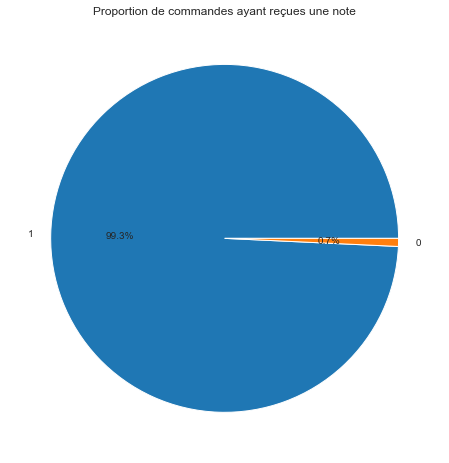

In [53]:
olist_order_items.is_reviewed.value_counts().plot.pie(autopct='%1.1f%%',title='Proportion de commandes ayant reçues une note',label='',figsize=(10,8))
plt.show()

### Proportion of Orders Receiving a Rating

The pie chart shows that **99.3% of orders received a rating**, an unusually high rate that may suggest artificial score generation. Possible explanations include:
- **Default scores** assigned to unreviewed orders.
- **Automated ratings** for quality control or internal metrics.

Only **0.7% of orders are unreviewed**, which is low compared to typical e-commerce behavior. To verify this high review rate, further checks on score distribution, timestamps, and the presence of comments are recommended to determine if ratings reflect genuine customer feedback.


**Let's take a look at the distribution of the scores attributed to orders:**.


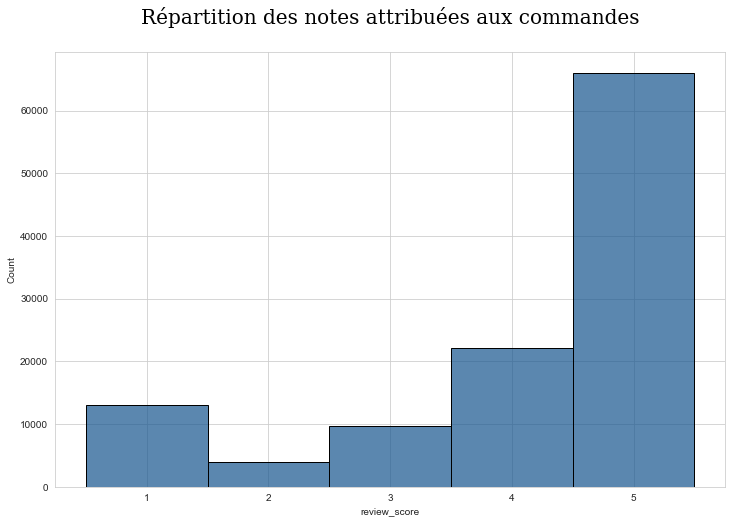

In [54]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=olist_order_items, x="review_score", 
             discrete=True,
             edgecolor="black",
             color="#16558e", alpha=0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n",
          fontdict=font_title)
plt.show()

### Distribution of Ratings Assigned to Orders

The histogram above displays the distribution of review scores. A few observations:

1. **High Concentration of 5-Star Ratings**: The majority of orders received a rating of 5, which could suggest either a highly satisfied customer base or, potentially, artificially inflated scores.

2. **Lower Ratings Are Less Frequent**: Ratings from 1 to 4 appear much less frequently, further supporting the possibility that 5-star ratings might be automatically applied or encouraged.

Combined with the previous observation of a 99.3% rating rate, this distribution raises the possibility that some ratings were generated by default or through an automated process. Further analysis of timestamps and review content could help verify if this pattern reflects genuine customer satisfaction or automated scoring.


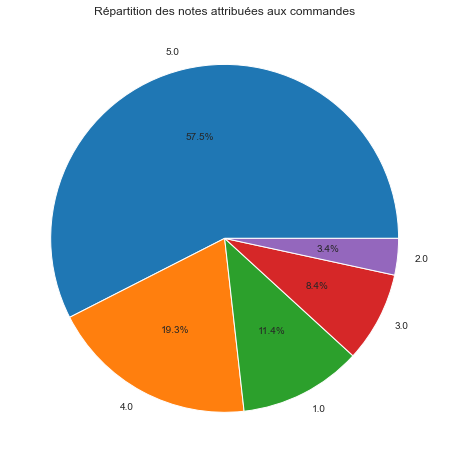

In [55]:
olist_order_items.review_score.value_counts().plot.pie(autopct='%1.1f%%',title='Répartition des notes attribuées aux commandes',label='',figsize=(10,8))
plt.show()

### Distribution of Ratings Assigned to Orders

This pie chart displays the proportion of each rating (from 1 to 5 stars) for customer orders. Key insights include:

1. **Dominance of 5-Star Ratings**: With **57.5%** of orders rated 5, there is a clear tendency toward high ratings, similar to what was observed in the histogram. This could indicate high customer satisfaction or, possibly, automated scoring.

2. **Less Frequent Lower Ratings**: Lower ratings (1 to 4 stars) make up a smaller portion, with 4 stars at **19.3%**, 1 star at **11.4%**, 3 stars at **8.4%**, and 2 stars at **3.4%**. This skewed distribution suggests that 5-star ratings are disproportionately common.

These observations align with the high overall review rate, raising the possibility that some scores might be generated by default or influenced by platform mechanisms. Further investigation could help confirm whether this reflects genuine customer satisfaction.


## Join the remaining files and create the final dataset : 

**Merge on client file :**

In [56]:
olist_order_items = pd.merge(olist_order_items, olist_customer,
                       how="left",
                       on="customer_id")
olist_order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,is_reviewed,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,1,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


In [57]:
df_top_city = olist_order_items.customer_city.value_counts(ascending=False)[:10].to_frame().reset_index() #Top 10 des villes avec le plus de commandes
df_top_city = df_top_city.rename(columns={"index": "City", "customer_city": "Nb_commandes"})

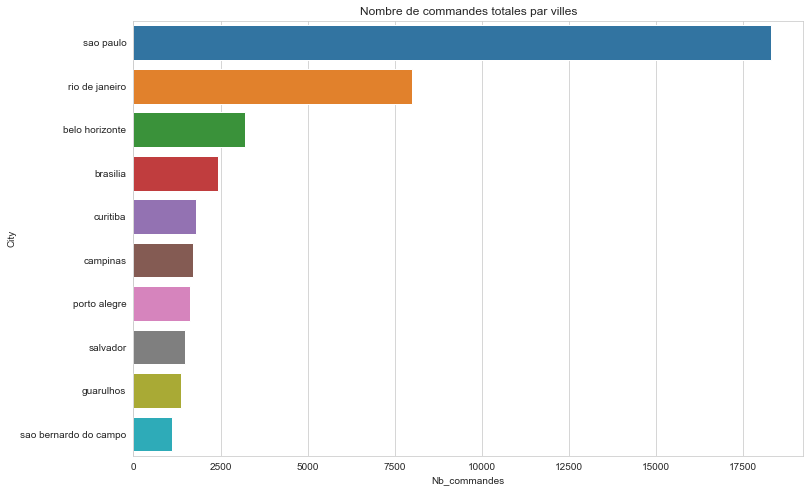

In [58]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Nb_commandes", y="City", data=df_top_city)
plt.title('Nombre de commandes totales par villes')
plt.show()

### Total Number of Orders by City

The bar chart shows the total number of orders by city, highlighting the main urban centers where Olist's customers are located. Key insights include:

1. **Dominance of São Paulo**: São Paulo stands out with the highest number of orders, significantly exceeding other cities. This suggests that São Paulo is Olist's largest market and a primary focus for targeted marketing efforts.

2. **High Demand in Rio de Janeiro**: Rio de Janeiro follows as the second-largest city in terms of order volume, indicating a strong customer base in this region as well.

3. **Concentration in Major Cities**: Other cities like Belo Horizonte, Brasília, and Curitiba show substantial order counts, but far below São Paulo and Rio. This pattern suggests that Olist's customer base is concentrated in Brazil's largest metropolitan areas.

This distribution of orders can help Olist prioritize marketing and logistics efforts, focusing on high-demand cities while exploring growth opportunities in other urban centers.


In [59]:
df_top_state = olist_order_items.customer_state.value_counts(ascending=False)[:10].to_frame().reset_index() #Top 10 états avec le plus de commandes
df_top_state = df_top_state.rename(columns={"index": "State", "customer_state": "Nb_commandes"})

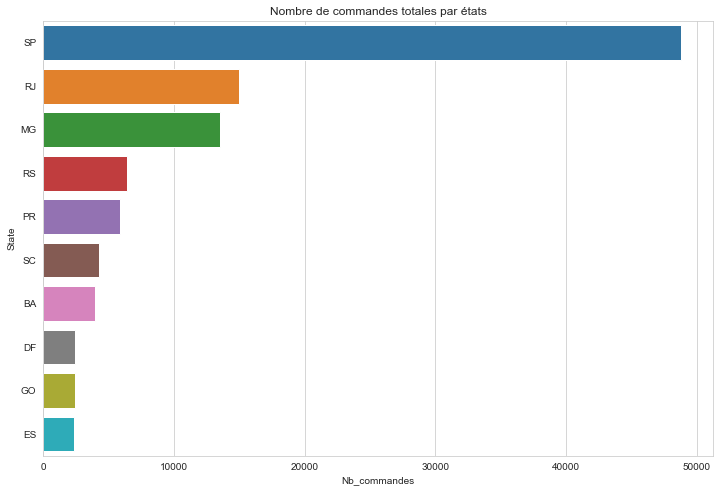

In [60]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Nb_commandes", y="State", data=df_top_state)
plt.title('Nombre de commandes totales par états')
plt.show()

### Total Number of Orders by State

The bar chart shows the total number of orders by Brazilian state, providing insight into regional demand for Olist's platform. Key observations include:

1. **Dominance of São Paulo (SP)**: The state of São Paulo leads by a significant margin in terms of order volume, reinforcing its position as Olist's largest market.

2. **High Demand in Rio de Janeiro (RJ) and Minas Gerais (MG)**: The states of Rio de Janeiro and Minas Gerais also show substantial order volumes, indicating strong regional markets beyond São Paulo.

3. **Concentration in Southern and Southeastern Brazil**: Most of the high-demand states, including Rio Grande do Sul (RS), Paraná (PR), and Santa Catarina (SC), are located in the southern and southeastern regions. This suggests that Olist's customer base is heavily concentrated in these economically developed areas.

This geographic distribution of orders can help Olist prioritize logistics and tailor regional marketing efforts to maximize reach in high-demand states.


**Creation of the global dataset by performing the join with the products/categories:**

In [61]:
data = pd.merge(olist_order_items, olist_products,
               how="left",
               on="product_id")
data.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,price(log10),order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,is_reviewed,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.770115,2017,9,Sep,201709,20170913,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2.380030,2017,4,Apr,201704,20170426,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2.298853,2018,1,Jan,201801,20180114,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,1,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.113609,2018,8,Aug,201808,20180808,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.300813,2017,2,Feb,201702,20170204,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


---

# Feature engineering

We're going to focus on customer data, creating new variables and a new customer dataset from the variables we've created.

First, we delete variables that will not be useful for the customer dataset:

In [ ]:
cols_to_remove = ["order_status",
                 "price(log10)",
                 "order_purchase_year",
                 "order_purchase_month",
                 "order_purchase_month_name",
                 "order_purchase_year_month",
                 "order_purchase_date",
                 "review_id",
                 "review_comment_title",
                 "review_comment_message",
                 "review_creation_date",
                 "review_answer_timestamp",
                 "is_reviewed",
                 "product_name_lenght",
                 "product_description_lenght",
                 "product_photos_qty",
                 "customer_id" #we have the variable customer_unique_id which identifies a customer
                 ]

In [63]:
data = data.drop(cols_to_remove, axis=1)

In [64]:
data.head()

,order_id,order_item_id,product_id,price,freight_value,order_purchase_timestamp,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,credit_card,3.0,259.83,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,credit_card,5.0,216.87,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,credit_card,2.0,25.78,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,credit_card,3.0,218.04,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,garden_tools


We can characterize a customer using the following features:

- Their **unique identifier** (`customer_unique_id`)

The features related to an RFM segmentation:

- **Recency** of purchase, expressed in days since the most recent order (`days_last_order`)
- **Number of orders** placed over the total period, corresponding to purchase **frequency** (`nb_orders`)
- **Total spend** (`total_spend`)

Additionally, other features that characterize customers and can enhance segmentation:

- **Average amount spent** per order (`mean_price_order`)
- **Average satisfaction rating** (`mean_review_score`)
- **Total number of items** purchased (`total_items`)
- **Average number of items per order** (`mean_nb_items`)
- **Zip code** (`customer_zip_code_prefix`)


**The customer dataset is created from the customer's last purchase date:**.

In [65]:
df_clients = data.loc[data.groupby('customer_unique_id').order_purchase_timestamp.idxmax()][["customer_unique_id","order_purchase_timestamp"]]

**Creating the `days_last_order` variable**:

In [66]:
df_clients["days_last_order"] = (pd.Timestamp.now()  - data.order_purchase_timestamp).astype('timedelta64[D]').astype(int)
df_clients = df_clients.rename(columns={"order_purchase_timestamp":"date_last_order"})

In [67]:
df_clients.head()

,customer_unique_id,date_last_order,days_last_order
102506,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495
24160,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498
81041,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921
29449,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705
98476,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672


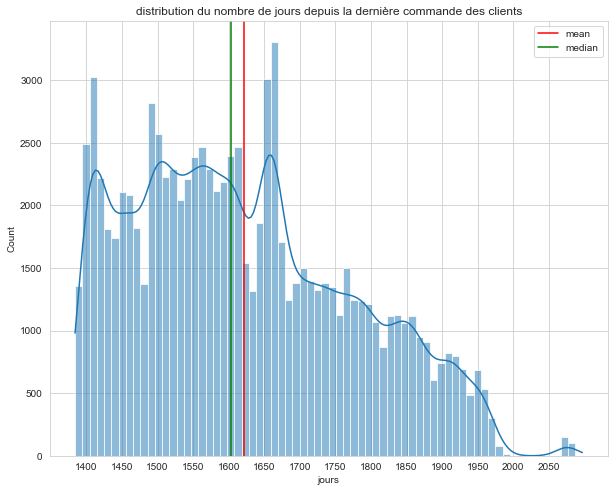

In [99]:
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=df_clients, x="days_last_order", kde=True)
plt.xlabel('jours')
plt.title("distribution du nombre de jours depuis la dernière commande des clients")
plt.axvline(x=df_clients.days_last_order.mean(), c='r', label='mean')
plt.axvline(x=df_clients.days_last_order.median(), c='g', label='median')
plt.legend()
plt.xticks(np.arange(1400,2100,50))
plt.show()

### Distribution of Days Since Last Purchase

This chart shows the distribution of days since customers' last purchase, with the mean (red) and median (green) marked.

**Key Insights:**
1. **Inactive Customer Segment**: Many customers haven’t ordered in about 1600 days, indicating a potential target group for reactivation campaigns.
2. **Declining Activity Over Time**: The drop-off in recent orders suggests an opportunity to boost engagement with tailored offers for inactive customers.
3. **Optimal Timing for Re-engagement**: The mean and median values help identify the best timing to reach out to customers before they become inactive.

These insights can guide loyalty programs and reactivation strategies to retain and re-engage Olist's customer base.


**Create variable: (`nb_orders`)**

In [69]:
grp_order = data.groupby("customer_unique_id")[["order_id"]].nunique()
grp_order = grp_order.rename(columns={"order_id":"nb_orders"})
grp_order

,nb_orders
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


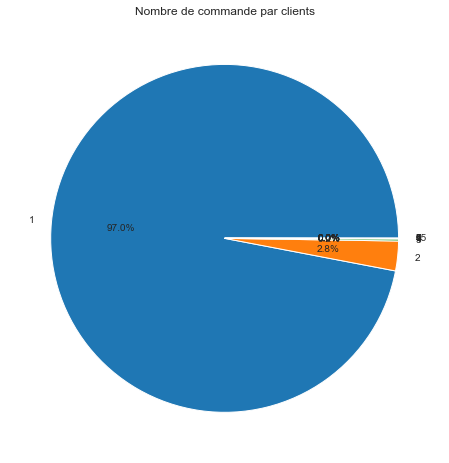

In [70]:
grp_order["nb_orders"].value_counts(ascending=False).plot.pie(autopct='%1.1f%%',title="Nombre de commande par clients",label='',figsize=(10,8))
plt.show()

### Number of Orders per Customer

This pie chart shows that **97% of customers placed only one order**, with only **3% making multiple purchases**. This has significant implications for RFM segmentation:

- **Frequency is Not Useful**: Since most customers are one-time buyers, frequency is not a meaningful differentiator for segments.
- **Focus on Recency and Monetary Value (Total Spend)**: RFM segmentation should rely on **recency** and **monetary value** to identify valuable customer groups.
- **Opportunity for Re-engagement**: The high rate of one-time buyers suggests potential for re-engagement strategies to encourage repeat purchases.

This insight is crucial for tailoring segmentation and targeting efforts effectively.


In [71]:
df_clients = pd.merge(df_clients, grp_order,
                how="left",
                on="customer_unique_id")

**Create variable on total amount spent(`total_spend`)**:

In [72]:
grp_total_spend = data.groupby("customer_unique_id")[["price"]].sum()
grp_total_spend = grp_total_spend.rename(columns={"price":"total_spend"})
grp_total_spend

,total_spend
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
fffea47cd6d3cc0a88bd621562a9d061,64.89
ffff371b4d645b6ecea244b27531430a,89.90


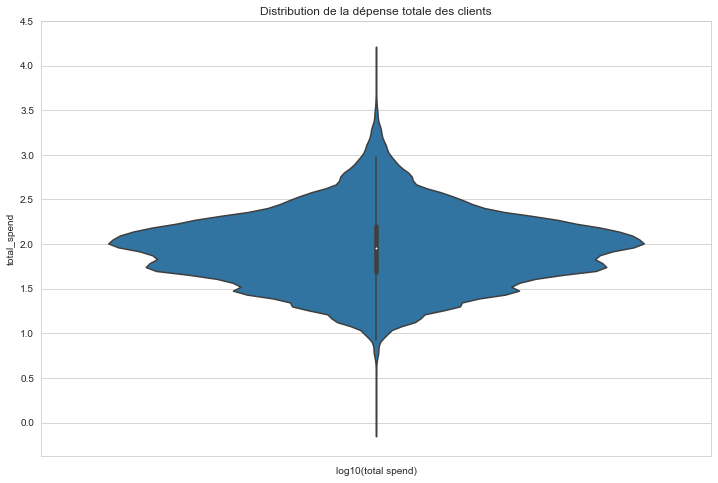

In [73]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(y=np.log10(grp_total_spend["total_spend"]))
ax.set_xlabel("log10(total spend)")
plt.yticks(np.arange(0,5,0.5))
plt.title("Distribution de la dépense totale des clients")
plt.show()

### Distribution of Total Customer Spend

This violin plot shows the log-transformed distribution of total customer spend. Key insights:

- **Asymmetry in Spend**: Most customers have relatively low total spend, while a small number of high-spending customers stand out.
- **High-Value Customers**: These high spenders, though rare, contribute significantly to revenue, highlighting a valuable segment for targeted marketing.

**Business Implications**:
- **Customer Segmentation**: Divide customers into low and high spenders, tailoring marketing efforts accordingly.
- **Retention of High-Value Customers**: Offer exclusive benefits to high spenders to increase loyalty and retention.
- **Efficient Marketing Allocation**: Use low-cost campaigns for the majority of low spenders, and focused efforts for high-value customers.


In [74]:
df_clients = pd.merge(df_clients, grp_total_spend,
                how="left",
                on="customer_unique_id")

In [75]:
df_clients.head()

,customer_unique_id,date_last_order,days_last_order,nb_orders,total_spend
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672,1,180.00


**Create variable on average spend per order and per customer: `mean_price_order`:**

In [76]:
df_clients["mean_price_order"] = round(df_clients["total_spend"] / df_clients["nb_orders"],2)

**Creation of the average satisfaction score per customer: (`mean_review_score`):**

In [77]:
grp_review = data.groupby("customer_unique_id")[["review_score"]].mean()
grp_review = grp_review.rename(columns={"review_score":"mean_review_score"})
grp_review

,mean_review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


In [78]:
df_clients = pd.merge(df_clients, grp_review,
                how="left",
                on="customer_unique_id")

In [79]:
df_clients.head()

,customer_unique_id,date_last_order,days_last_order,nb_orders,total_spend,mean_price_order,mean_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495,1,129.90,129.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498,1,18.90,18.90,4.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921,1,69.00,69.00,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705,1,25.99,25.99,4.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672,1,180.00,180.00,5.0


**Create a variable containing the total number of items purchased per customer: `total_items`:**

In [80]:
grp_total_items = data.groupby("customer_unique_id")[["order_item_id"]].count()
grp_total_items

,order_item_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [81]:
grp_total_items = grp_total_items.rename(columns={"order_item_id":"total_items"})
grp_total_items

,total_items
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


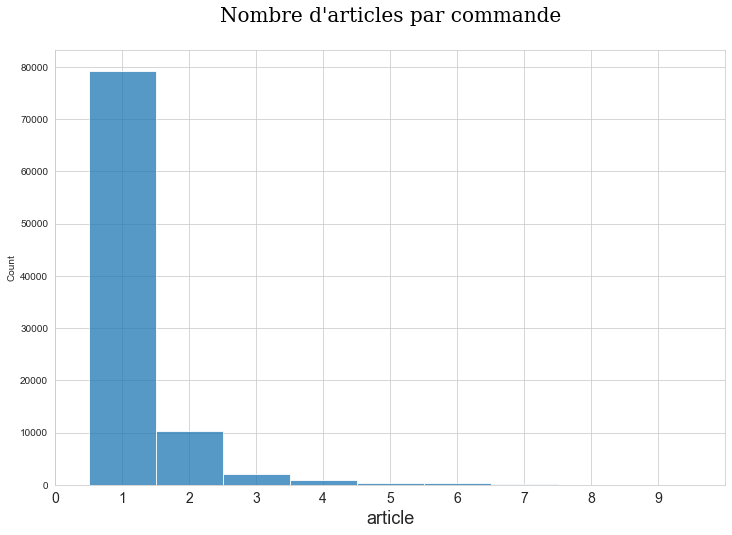

In [82]:
# Plot density of number items in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = grp_total_items,
             x="total_items",
             discrete=True)
plt.xlabel("article", fontsize=18)
plt.title(f"Nombre d'articles par commande\n",
          fontdict=font_title)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1),size=14)
plt.show()

### Number of Items per Order

This chart shows that most orders contain only one item, with a rapid drop-off for orders with multiple items.

**Business Implications**:
- **Upselling and Cross-selling**: Since most orders are single-item, Olist can increase average order value by recommending complementary products or offering discounts on additional items.
- **Promote Bundles**: To encourage multi-item purchases, Olist could create product bundles or group discounts.
- **Customer Loyalty**: Understanding this purchasing pattern helps design loyalty programs or targeted offers to boost the number of items per order.


In [83]:
df_clients = pd.merge(df_clients, grp_total_items,
                how="left",
                on="customer_unique_id")

In [84]:
df_clients

,customer_unique_id,date_last_order,days_last_order,nb_orders,total_spend,mean_price_order,mean_review_score,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495,1,129.90,129.90,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498,1,18.90,18.90,4.0,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921,1,69.00,69.00,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705,1,25.99,25.99,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672,1,180.00,180.00,5.0,1
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1831,1,1570.00,1570.00,5.0,2
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1646,1,64.89,64.89,4.0,1
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1952,1,89.90,89.90,5.0,1
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1503,1,115.00,115.00,5.0,1


**Create a variable containing the average number of items per order and per customer: `mean_nb_items`:**

In [85]:
grp_mean_total_items = data.groupby("customer_unique_id")[["order_item_id"]].mean()
grp_mean_total_items

,order_item_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,1.0
0004aac84e0df4da2b147fca70cf8255,1.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.5
fffea47cd6d3cc0a88bd621562a9d061,1.0
ffff371b4d645b6ecea244b27531430a,1.0


In [86]:
grp_mean_total_items = grp_mean_total_items.rename(columns={"order_item_id":"mean_nb_items"})
grp_mean_total_items

,mean_nb_items
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,1.0
0004aac84e0df4da2b147fca70cf8255,1.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1.5
fffea47cd6d3cc0a88bd621562a9d061,1.0
ffff371b4d645b6ecea244b27531430a,1.0


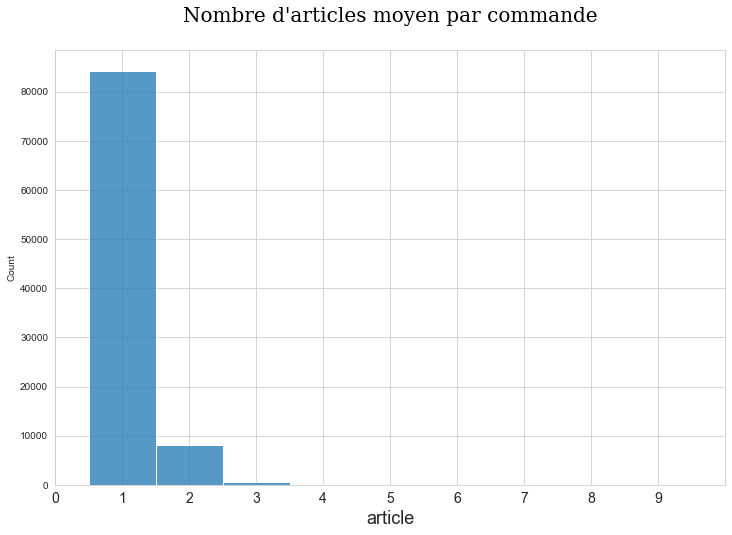

In [87]:
# Plot density of number items in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = grp_mean_total_items,
             x="mean_nb_items",
             discrete=True)
plt.xlabel("article", fontsize=18)
plt.title(f"Nombre d'articles moyen par commande\n",
          fontdict=font_title)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1),size=14)
plt.show()

The distributions are very similar between the total number of items and the average number of items. This can be explained by the fact that most customers order only once. This variable will therefore be less correlated over time.

In [88]:
df_clients = pd.merge(df_clients, grp_mean_total_items,
                how="left",
                on="customer_unique_id")

In [89]:
df_clients.head()

,customer_unique_id,date_last_order,days_last_order,nb_orders,total_spend,mean_price_order,mean_review_score,total_items,mean_nb_items
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495,1,129.90,129.90,5.0,1,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498,1,18.90,18.90,4.0,1,1.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921,1,69.00,69.00,3.0,1,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705,1,25.99,25.99,4.0,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672,1,180.00,180.00,5.0,1,1.0


**zip code variable added :**

In [90]:
customers_info = olist_customer.groupby("customer_unique_id")[["customer_zip_code_prefix"]].agg(lambda x:x.value_counts().index[0])
customers_info = customers_info.rename(columns={"customer_zip_code_prefix":"zip_code"})
customers_info

,zip_code
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,7787
0000b849f77a49e4a4ce2b2a4ca5be3f,6053
0000f46a3911fa3c0805444483337064,88115
0000f6ccb0745a6a4b88665a16c9f078,66812
0004aac84e0df4da2b147fca70cf8255,18040
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250
fffea47cd6d3cc0a88bd621562a9d061,44054
ffff371b4d645b6ecea244b27531430a,78552


In [91]:
df_clients = pd.merge(df_clients, customers_info,
                how="left",
                on="customer_unique_id")

In [92]:
df_clients.head()

,customer_unique_id,date_last_order,days_last_order,nb_orders,total_spend,mean_price_order,mean_review_score,total_items,mean_nb_items,zip_code
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1495,1,129.90,129.90,5.0,1,1.0,7787
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1498,1,18.90,18.90,4.0,1,1.0,6053
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1921,1,69.00,69.00,3.0,1,1.0,88115
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1705,1,25.99,25.99,4.0,1,1.0,66812
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1672,1,180.00,180.00,5.0,1,1.0,18040


In [93]:
df_clients.shape

(93358, 10)

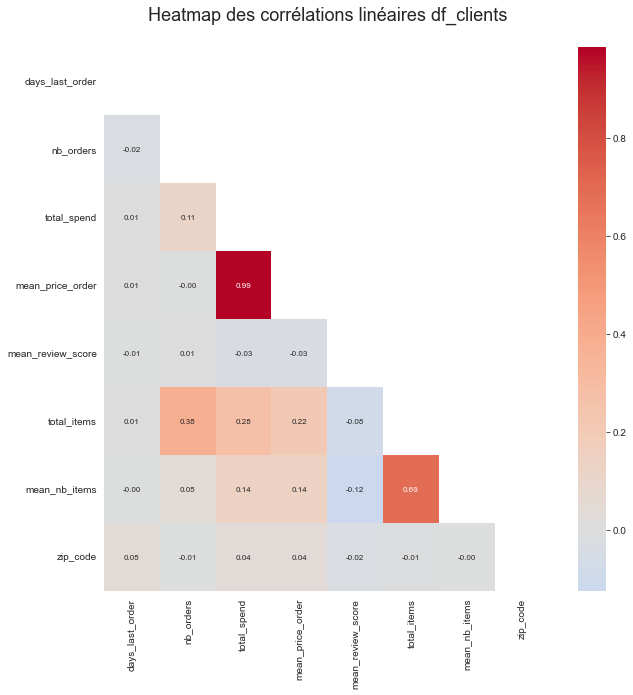

In [94]:
corr = df_clients.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires df_clients\n", fontsize = 18)
plt.show()

We observe: 
- Total price (`total_spend`) is highly correlated with average price per order (`mean_price_order`)
- The total number of items (`total_items`) is highly correlated with the average number of items per order (`mean_nb_items`). 
This can be explained by the fact that most customers order only once. This variable will therefore be less correlated over time.

**We save the df_clients in a pickle file:**

In [ ]:
df_clients.to_pickle('data_clients.pickle')

### Conclusion of Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) provided a comprehensive view of customer behavior, purchase patterns, and key metrics, laying a strong foundation for the segmentation process. Key insights include:

1. **Customer Purchase Behavior**: A large majority of customers are one-time buyers, with only a small percentage making repeat purchases. This highlights the potential for re-engagement and loyalty strategies to encourage repeat purchases and build long-term customer relationships.

2. **Order Characteristics**: Most orders contain only one item, suggesting opportunities for upselling and cross-selling to increase the average order value. Bundling and multi-item discounts could also be effective in encouraging customers to purchase more items per order.

3. **Spending Distribution**: Customer spending is highly skewed, with a small proportion of high-value customers contributing disproportionately to revenue. This justifies a focus on high-value customers in targeted marketing and retention efforts.

4. **Geographical Concentration**: Orders are concentrated in major cities and states, especially São Paulo, Rio de Janeiro, and Minas Gerais. This geographic concentration provides a clear roadmap for localized marketing and logistics optimization.

5. **Rating Patterns**: The high percentage of orders with ratings and the skew towards high ratings suggest potential rating bias or default scoring. Further investigation may help verify whether these ratings accurately reflect customer satisfaction.

6. **Correlation Analysis**: The correlation matrix reveals strong relationships between certain features, such as `total_spend` and `mean_price_order`. This suggests that spending behavior is a crucial differentiator for customer value. Low correlations with features like `days_last_order` (recency) and `mean_review_score` (satisfaction) indicate that these variables may provide unique insights for segmentation.

### Next Steps

These insights guide the feature selection and focus areas for the segmentation process. Moving forward, the next steps involve:
- Using relevant features, especially spending and recency, to define meaningful customer segments.
- Developing strategies tailored to each segment, focusing on re-engagement for one-time buyers, loyalty for high-value customers, and personalized marketing based on geographic and behavioral patterns.

The findings from this EDA will enable the creation of actionable and targeted strategies to maximize Olist’s customer engagement and lifetime value.
